In [2]:
import pandas as pd
import sqlite3

In [3]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [4]:
query = """ SELECT datetime FROM pageviews
WHERE uid LIKE 'user_%' 
"""
views = pd.read_sql(query, db, parse_dates=['datetime'])
views

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [5]:
views_count = (views.assign(date = views['datetime'].dt.date).groupby('date').size().reset_index(name='visit_count')).sort_values('date', ascending = True)
views_count['date'] = pd.to_datetime(views_count['date'])
views_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         33 non-null     datetime64[ns]
 1   visit_count  33 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 660.0 bytes


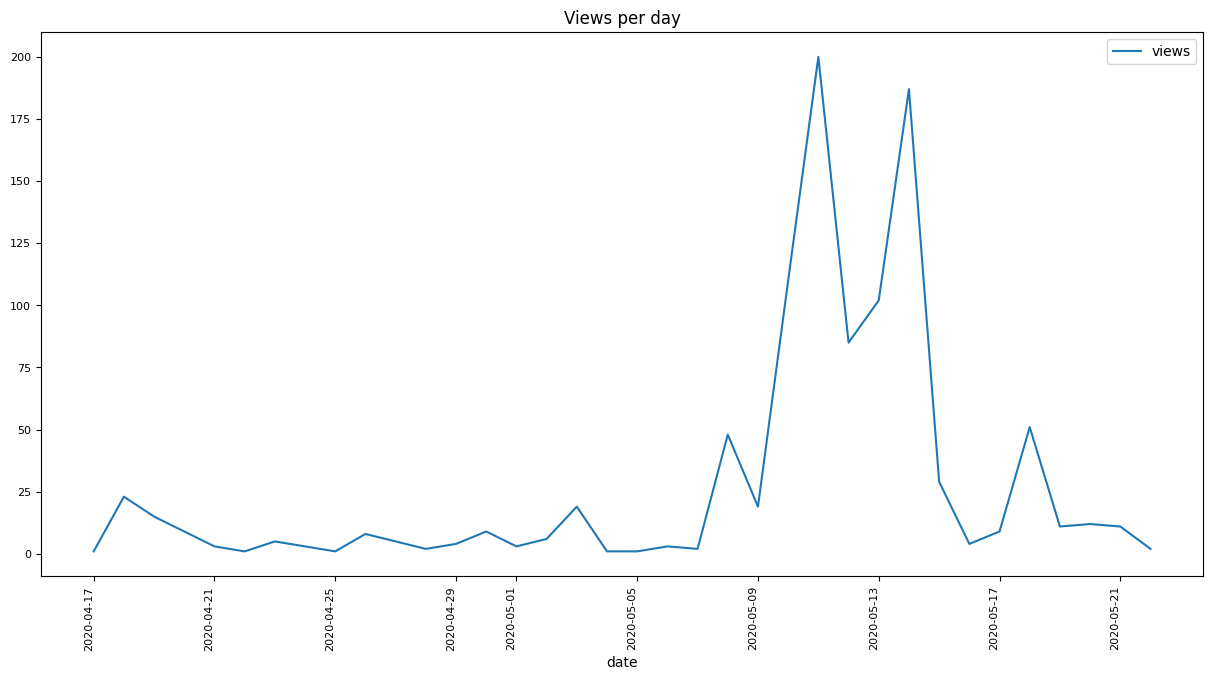

In [6]:
plot = views_count.plot(x='date',y = 'visit_count', xlabel = 'date', title= 'Views per day', label='views', fontsize=8, figsize=(15,8), rot = 90)

In [7]:
db.close()